# Machine Learning Task 2 - Classification

Build different classification models from historical data of patients and their responses to different medications. Then you use the trained algorithms to predict the class of an unknown patient or to find a proper drug for a new patient.


In [ ]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-01-18 17:27:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-18 17:27:50 (1.47 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('drug200.csv')
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


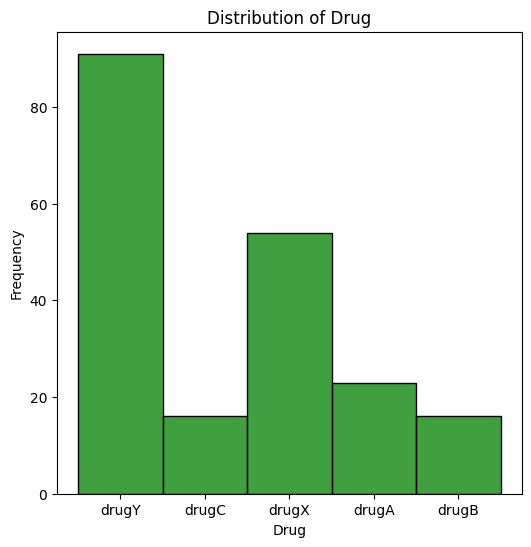

In [ ]:
#Visualizing Data Distributions

plt.figure(figsize=(6, 6))
sns.histplot(df['Drug'], bins=20, color='green')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Distribution of Drug')
plt.show()

In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


Age skewness:  0.03030835703000607


<ipython-input-12-ae47f957d99a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


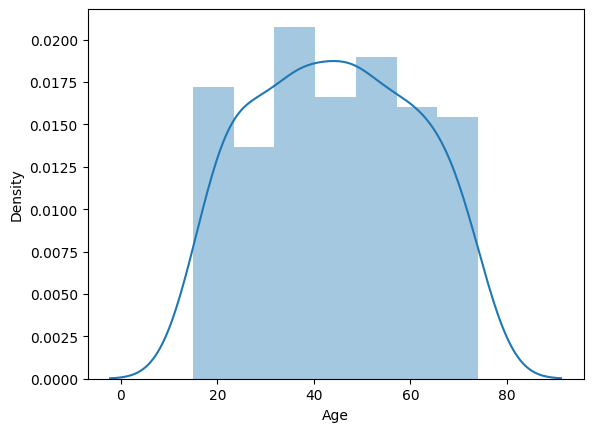

In [ ]:
#analysing the skewness of numerical data:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)
sns.distplot(df['Age']);


Na to K skewness:  1.039341186028881


<ipython-input-13-de4678c069ab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K'])


<Axes: xlabel='Na_to_K', ylabel='Density'>

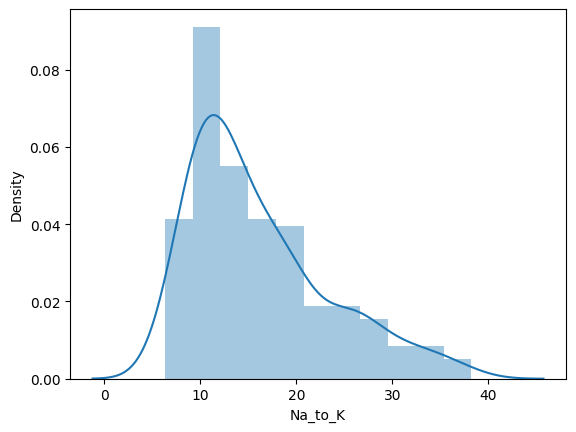

In [ ]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)
sns.distplot(df['Na_to_K'])

<ipython-input-14-db5248ab6faf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette = "cubehelix")


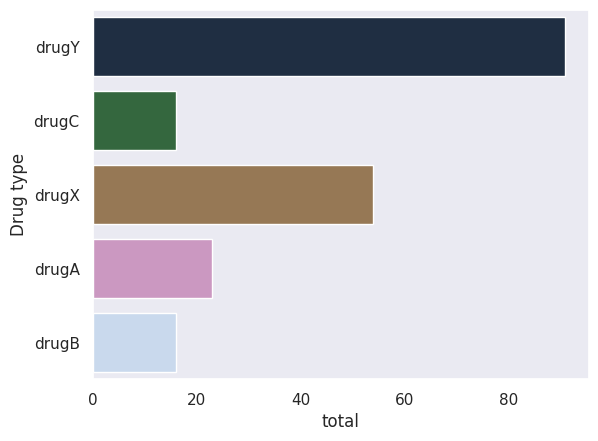

In [ ]:
# Drug Type Distribution
sns.set_theme(style="dark")
sns.countplot(y="Drug", data=df, palette = "cubehelix")
plt.ylabel("Drug type")
plt.xlabel("total")
plt.show()


<ipython-input-15-bb818ab26114>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette= "rocket")


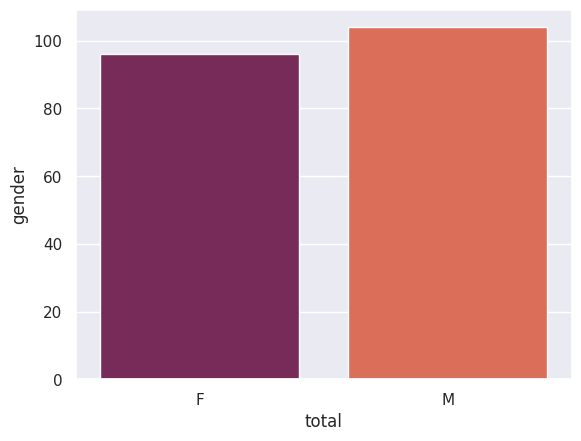

In [ ]:
#Gender Distribution
sns.set_theme(style='darkgrid')
sns.countplot(x="Sex", data=df, palette= "rocket")
plt.ylabel("gender")
plt.xlabel("total")
plt.show()

<ipython-input-16-c96ff65d8aa7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "BP", data=df, palette="cubehelix")


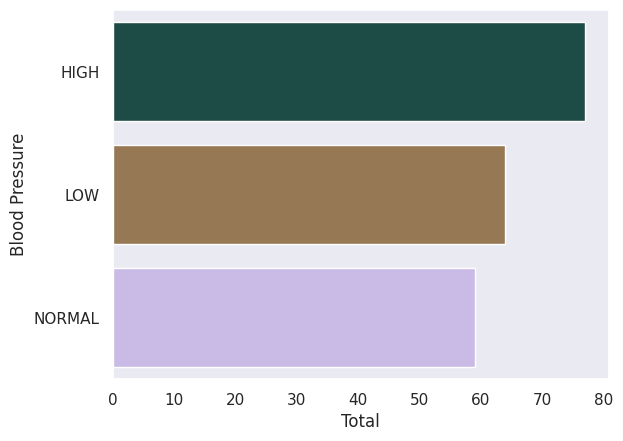

In [ ]:
# Blood Pressure Distribution
sns.set_theme(style="dark")
sns.countplot(y = "BP", data=df, palette="cubehelix")
plt.ylabel("Blood Pressure")
plt.xlabel("Total")
plt.show()

<ipython-input-17-719743a0bcfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df, palette="crest")


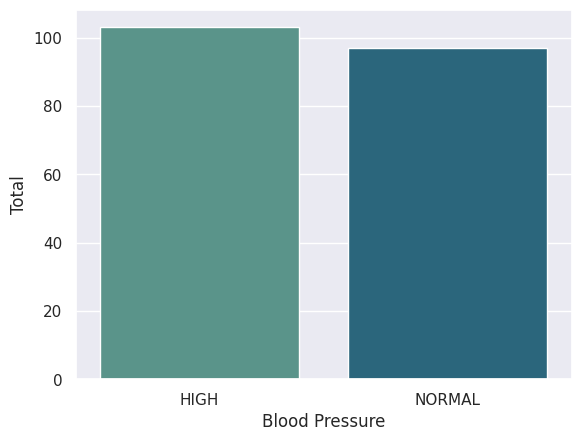

In [ ]:
# Cholesterol Distribution
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="crest")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

In [ ]:
#Age is divided into 7 bins:0 to 19,20-29,20-29,40-49,50-59,60-69,more than or equal to 70

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df_drug = df.drop(['Age'], axis = 1)


#Na_to_K ratio is divided into 4 categories: 0 to 9,10 to 19,20 to 29,above or equal to 30

bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df.drop(['Na_to_K'], axis = 1)



In [ ]:

#Splitting the dataset

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s
131,52,32.922,0,1,0,1,0,0,1,0,0,0,0,1,0,0
96,58,38.247,1,0,0,1,0,1,0,0,0,0,0,1,0,0
181,59,13.884,1,0,0,0,1,1,0,0,0,0,0,1,0,0
19,32,25.974,1,0,1,0,0,0,1,0,0,1,0,0,0,0
153,72,14.642,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_drug.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<ipython-input-22-37f931900502>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=df_drug, palette="magma")


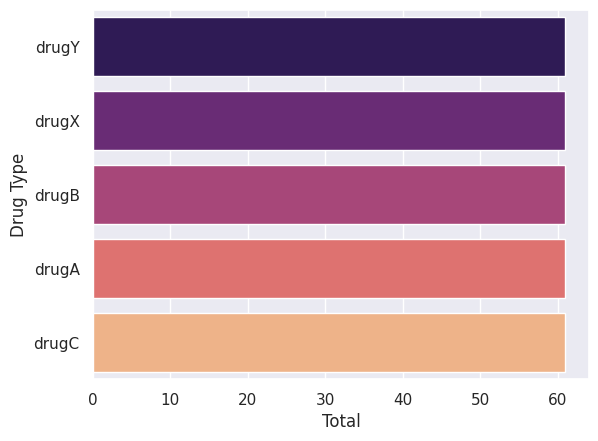

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="magma")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()


In [ ]:
#Classification Models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       0.67      0.67      0.67         3
       drugC       0.80      1.00      0.89         4
       drugX       0.94      0.94      0.94        18
       drugY       0.93      0.87      0.90        30

    accuracy                           0.90        60
   macro avg       0.83      0.90      0.86        60
weighted avg       0.90      0.90      0.90        60

[[ 5  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  4  0  0]
 [ 0  0  0 17  1]
 [ 1  1  1  1 26]]
Logistic Regression accuracy is: 90.00%


In [ ]:
# K-Neighbours
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))


              precision    recall  f1-score   support

       drugA       0.22      1.00      0.36         5
       drugB       0.20      0.67      0.31         3
       drugC       0.50      0.25      0.33         4
       drugX       0.75      0.17      0.27        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.53        60
   macro avg       0.53      0.56      0.42        60
weighted avg       0.79      0.53      0.56        60

[[ 5  0  0  0  0]
 [ 0  2  0  1  0]
 [ 3  0  1  0  0]
 [11  3  1  3  0]
 [ 4  5  0  0 21]]
K Neighbours accuracy is: 53.33%


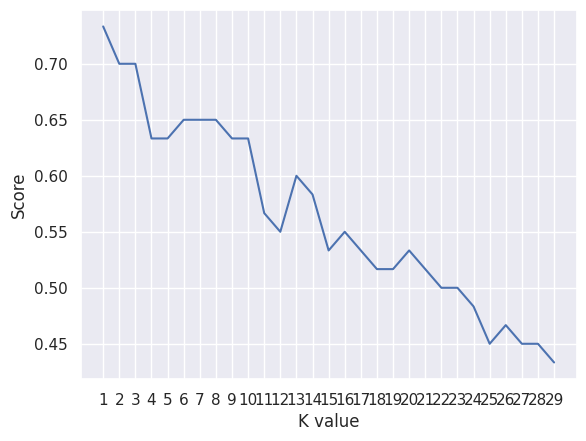

KNN Acc Max 73.33%


In [ ]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))


In [ ]:
#Support Vector Machine SVM
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  1  0  0 29]]
SVC accuracy is: 98.33%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
#Categorical Naive Bayes
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))


              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      0.75      0.60         4
       drugX       0.86      1.00      0.92        18
       drugY       1.00      0.63      0.78        30

    accuracy                           0.80        60
   macro avg       0.72      0.88      0.76        60
weighted avg       0.87      0.80      0.80        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  1  0]
 [ 0  0  0 18  0]
 [ 5  1  3  2 19]]
Naive Bayes accuracy is: 80.00%


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       0.56      1.00      0.71         5
       drugB       0.50      1.00      0.67         3
       drugC       0.67      1.00      0.80         4
       drugX       0.78      1.00      0.88        18
       drugY       1.00      0.53      0.70        30

    accuracy                           0.77        60
   macro avg       0.70      0.91      0.75        60
weighted avg       0.85      0.77      0.76        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 4  3  2  5 16]]
Gaussian Naive Bayes accuracy is: 76.67%


In [ ]:

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Decision Tree accuracy is: 100.00%


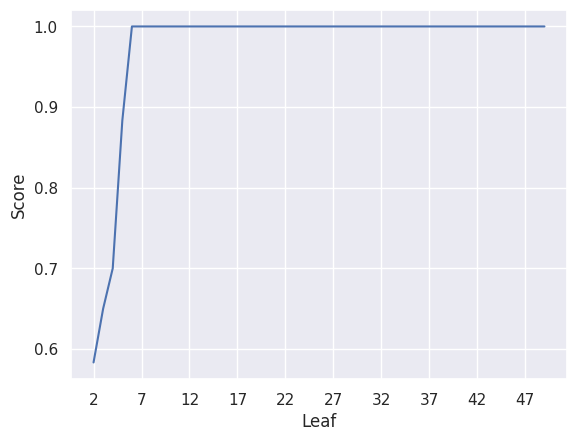

DT Acc Max 100.00%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Random Forest accuracy is: 100.00%


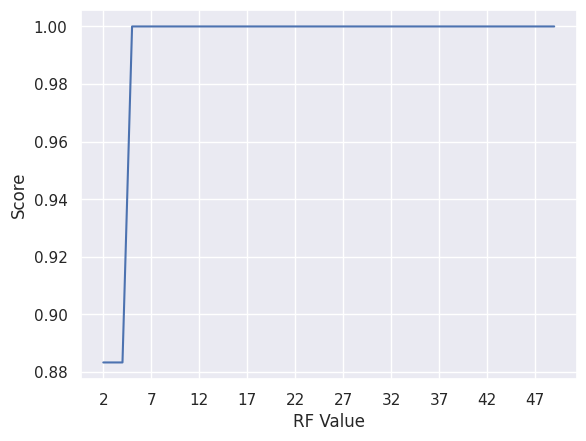

RF Acc Max 100.00%


In [ ]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [ ]:
#Model Comparison
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Decision Tree,100.000000
7,Decision Tree Max,100.000000
8,Random Forest,100.000000
9,Random Forest Max,100.000000
3,SVM,98.333333
0,Logistic Regression,90.000000
4,Categorical NB,80.000000
5,Gaussian NB,76.666667
2,K Neighbors Max,73.333333
1,K Neighbors,53.333333
